In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt   #Data visualisation libraries 
import sklearn
from sklearn.model_selection import cross_val_score
# Sci-kit Learn Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
# Metrics
from sklearn.metrics import mean_squared_error
from pprint import pprint
import copy

In [2]:
loan_df = pd.read_csv('D:\Academic\Data Science\lc_data/cleaned_data.csv')
loan_df.head(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,acc_now_delinq
0,0,5000.0,5000.0,4975.0,1,10.65,162.87,2,7,6,...,0.00,0.00,171.62,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
1,1,2500.0,2500.0,2500.0,2,15.27,59.83,3,14,6,...,117.08,1.11,119.66,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
2,2,2400.0,2400.0,2400.0,1,15.96,84.33,3,15,6,...,0.00,0.00,649.91,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
3,3,10000.0,10000.0,10000.0,1,13.49,339.31,3,11,6,...,0.00,0.00,357.48,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
4,4,3000.0,3000.0,3000.0,2,12.69,67.79,2,10,6,...,0.00,0.00,67.79,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0


In [3]:
# Labels (y_true of this dataset)
y = loan_df.pop("int_rate")

In [4]:
train = int(len(loan_df) * 0.60)
val = int(len(loan_df) * 0.20)
test = int(len(loan_df) * 0.20)

In [5]:
def cross_validate(clf, df, test_x, test_y, k = 5) :
  # Build the metric dict.
  metric = {"train":{"mse": [], "score": []},
            "val" : {"mse": [], "score": []},
            "test" :{"mse": [], "score": []}};

  split = int(len(df) * 0.80)
  for i in range(k) :
    df = df.sample(frac=1)
    y = df["label"]
    x = df.loc[:, df.columns != 'label']
    train_x, train_y = x[:split],y[:split]
    val_x, val_y = x[split:], y[split:]
    model = copy.deepcopy(clf)
    model.fit(train_x, train_y)  
    # Log the Mean Square Error
    metric["train"]["mse"].append(mean_squared_error(train_y,model.predict(train_x)))
    metric["val"]["mse"].append(mean_squared_error(val_y,model.predict(val_x)))
    metric['test']["mse"].append(mean_squared_error(test_y,model.predict(test_x))) 
    # Log the Model Score
    metric["train"]["score"].append(model.score(train_x,train_y))
    metric["val"]["score"].append(model.score(val_x,val_y))
    metric["test"]["score"].append(model.score(test_x,test_y))    
  return metric
  

In [6]:
crossValidationSet = copy.deepcopy(loan_df[:train+val]);
crossValidationSet["label"] = y[:train+val];

In [7]:
train_x,train_y = loan_df[:train], y[:train]
val_x, val_y = loan_df[train: train + val], y[train: train + val]
test_x, test_y = loan_df[train + test :], y[train + test :]

assert len(train_x) == train, "Training set length does not match expected train length"
assert len(val_x) == val, "Validation set length does not match expected validation length"
assert len(test_x) >= test , "Test set length does not match expected test length"

In [8]:
lr = LinearRegression() # Init
lr.fit(train_x, train_y) # Train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Linear Regression Score and MSE

1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [9]:
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MSE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Linear Regression:", mean_squared_error(train_y, lr.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Linear Regression:", mean_squared_error(val_y, lr.predict(val_x)))

# MSE on test set
print("Test Set MSE Linear Regression:", mean_squared_error(test_y, lr.predict(test_x)))

Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MSE Linear Regression: 0.7588524105425732
Validation Set MSE Linear Regression: 0.30090928582755705
Test Set MSE Linear Regression: 0.24695311566090825


# 5 Fold Cross Validation

In [10]:
lr_cv = LinearRegression()
cv_result = cross_validate(lr_cv, crossValidationSet, test_x, test_y)
pprint(cv_result)

{'test': {'mse': [0.1698567119444454,
                  0.17082728702370795,
                  0.17063510545766286,
                  0.16986077615484588,
                  0.17134910659779698],
          'score': [0.9911213707500262,
                    0.9910706375397256,
                    0.9910806831178723,
                    0.9911211583085104,
                    0.9910433613580505]},
 'train': {'mse': [0.6194608292323628,
                   0.6196941758562468,
                   0.619809008521607,
                   0.6209701578783066,
                   0.6213468797950916],
           'score': [0.9676921211884078,
                     0.9676968768471877,
                     0.9676863990396259,
                     0.9675973326016657,
                     0.9675976473079582]},
 'val': {'mse': [0.6284896166183594,
                 0.6346341173052077,
                 0.6271540632570671,
                 0.6224716891598275,
                 0.6279408982302397],
         'score

In [13]:
lr_predictions = lr.predict(test_x)

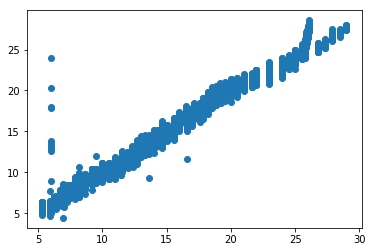

In [14]:
plt.scatter(test_y,lr_predictions)